<a href="https://colab.research.google.com/github/SeungPang11/Customer-Analysis-and-Segmentation/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Analysis Project - Statistical Analysis, Clustering

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

This project utilizes **EDA, Statistical Analysis, and Machine Learning (K-Means Clustering)** techniques to analyze customer behavior and help a business understand customers through data-driven solutions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.stats import t
from scipy.stats import ttest_ind
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import plotly.express as px
import scipy
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## Loading Datasets

In [76]:
df = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv", sep="\t")

In [ ]:
df.head(5)

In [ ]:
df.shape

In [ ]:
df.columns

## Check for Null Values

In [ ]:
#df.isnull().sum()
# Returns rows that has null values
# df[df.isna().any(axis=1)]

In [ ]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    return pd.concat([total], axis=1, keys=['Total'])
missing_data(df).style.background_gradient(cmap='Blues')

## Check Numerical vs. Categorical Variables
**Numerical Variables**:  ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'] <br>
**Categorical Variables**:  ['Education', 'Marital_Status', 'Dt_Customer']


In [ ]:
from pandas.api.types import is_numeric_dtype, is_string_dtype

num_list=[]
cat_list=[]

for column in df:
  if is_numeric_dtype(df[column]):
    num_list.append(column)
  elif is_string_dtype(df[column]):
    cat_list.append(column)

print("Numerical Variables: ", num_list)
print("Categorical Variables: ", cat_list)

In [ ]:
numeric_col = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases']
for column in df:
  if column in numeric_col:
    plt.figure(column, figsize=(3,3))
    plt.title(column)
    df[column].plot(kind="hist")
  # elif is_string_dtype(df[column]):
  #   df[column].value_counts()[:10](kind="bar")

## Check Unique Values within Certain Categorical Columns - Education, Marital Status

In [ ]:
df['Education'].unique()

In [ ]:
df['Marital_Status'].unique()

## Descriptive Statistics

In [ ]:
df.describe().T

## Statistical Analysis

**Chi-Squared Test** (categorical vs. categorical): <br>
Examine the relationship between two categorical variables <br><br>

***Education** and **Response** <br>
***Marital Status** and **Response**

In [ ]:
#Education and Response
edu_df = df[["Education","Response"]]
edu_df

In [ ]:
contingency= pd.crosstab(edu_df['Education'], edu_df['Response'])

In [ ]:
contingency

In [ ]:
c, p, dof, expected = chi2_contingency(contingency)

In [ ]:
print("p-value: ", p)
print("chi: ", c)
plt.figure(figsize=(6,4))
sns.heatmap(contingency, annot=True, cmap="PuBu", fmt=".1f")
plt.show()

In [ ]:
#Marital Status and Response
m_df = df[["Marital_Status","Response"]]

In [ ]:
contingency_m= pd.crosstab(m_df['Marital_Status'], m_df['Response'])
contingency_m

In [ ]:
c, p, dof, expected = chi2_contingency(contingency_m)

In [ ]:
print("p-value: ", p)
print("chi: ", c)
plt.figure(figsize=(6,4))
sns.heatmap(contingency_m, annot=True, cmap='YlGnBu', fmt=".1f")
plt.show()

**Sample t-test** (numerical vs. categorical): <br> Whether the **"Amount spent on wine"** in last 2 years OR "**Recency**" contributes to the <br>
prediction of “**Response**” (whether the customer accepted last campaign offer).<br><br>

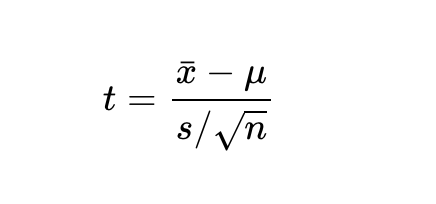

In [ ]:
#Take 100 random sample
sampled_df = df.sample(n=100, random_state=100)

In [ ]:
#MntWines AND Response
#1st sample - accepted campaign offer
#2nd sample - declined campaign offer

wine_P = sampled_df[sampled_df['Response']==1]['MntWines']
wine_N = sampled_df[sampled_df['Response']==0]['MntWines']

**Sample t-test**: <br><br>
-Right-tailed test<br>
-Hypothesis: "**Amount spent on wine**" in last 2 years increases the number of positive "**Response**"<br>
-H0: **Amount spent on wine** decreases positive **Response**.

In [ ]:
t_stat, p_val = ttest_ind(wine_P,wine_N,alternative = "less")
print('t-statistics: ', t_stat)
print('p-value: ', p_val)

if p_val <= 0.05:
  print("Reject Null Hypothesis H0")
elif p_val > 0.05:
  print("Not enough evidence to reject Null Hypothesis H0")

In [ ]:
#Box plot
fig = go.Figure()

fig.add_trace(go.Box(
   x=sampled_df[sampled_df['Response']==1]['Response'],
   y=sampled_df[sampled_df['Response']==1]['MntWines'],
   name="Yes", boxpoints="all", marker_color = 'indianred')
)

fig.add_trace(go.Box(
   x=sampled_df[sampled_df['Response']==0]['Response'],
   y=sampled_df[sampled_df['Response']==0]['MntWines'],
   name="No", boxpoints="all", marker_color='#17becf')
)

fig.update_layout(
   title_text="Response and Amount Spent on Wine",
   title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   width=500, height=500,
   xaxis_title="Response",
   yaxis_title="Mnt Wines",
   legend_title="legend"
   )

fig.show()

**Sample t-test**: <br><br>
-Left-tailed test<br>
-Hypothesis: "**Recency**" predicts the number of positive "**Response**" (Lower the Recency -> Greater positive response <br>
-H0: **Recency** doesn't predict **Response**.

In [ ]:
#Recency AND Response

In [ ]:
recency_P = sampled_df[sampled_df['Response']==1]['Recency']
recency_N = sampled_df[sampled_df['Response']==0]['Recency']

In [ ]:
t_stat, p_val = ttest_ind(recency_P,recency_N,alternative = "less")
print('t-statistics: ', t_stat)
print('p-value: ', p_val)

if p_val < 0.05:
  print("Reject Null Hypothesis H0")
elif p_val >= 0.05:
  print("Not enough evidence to reject Null Hypothesis H0")

In [ ]:
# Try T-Distribution with Plotly - Response and Recency

# Setup
n = 100
dof = n-2         # Degrees of freedom
alpha = 0.05    # Significence level

In [ ]:
xs = np.linspace(-3,3,200)
y = t.pdf(xs,dof)

critline1 = np.linspace(0,0.4)
xs_1 = len(critline1) * [-1.645] # X ranges for plotting
p = len(critline1) * [t_stat]

fig = go.Figure()

#t-dist
t1 = fig.add_traces(go.Scatter(x=xs, y=t.pdf(xs,dof),
              fill=None,
              mode='lines',
              line_color='lightblue',
              name="T-Distribution"))

#p-val
fig.add_trace(go.Scatter(x=p, y=critline1, name="P-Value", line={'dash': 'solid', 'color': 'lightsteelblue'}))

#significance level
fig.add_trace(go.Scatter(x=xs_1, y=critline1, name="Significance Level", line={'dash': 'dash', 'color': 'lightsalmon'}))

#fill between
xx = np.linspace(-3,-1.65, 45)
yy = y
fig.add_trace(
    go.Scatter(
        x = xx,
        y = yy,
        fill = 'tozeroy',
        name="Reject Null"
    )
)

fig.update_layout(
    width=650,
    height=600,
    title_text="T-Test - Recency and Response",
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.7)
    )

fig.show()

In [ ]:
# Box plot - Response and Recencey
fig = go.Figure()

fig.add_trace(go.Box(
   x=sampled_df[sampled_df['Response']==1]['Response'],
   y=sampled_df[sampled_df['Response']==1]['Recency'],
   name="Yes", boxpoints="all", marker_color = 'indianred')
)

fig.add_trace(go.Box(
   x=sampled_df[sampled_df['Response']==0]['Response'],
   y=sampled_df[sampled_df['Response']==0]['Recency'],
   name="No", boxpoints="all", marker_color='#9467bd')
)

fig.update_layout(
   title_text="Response and Recency",
   title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   width=500, height=500,
   xaxis_title="Response",
   yaxis_title="Recency",
   legend_title="legend"
   )

fig.show()

## K-Means Clustering for Customer Segmentation
In order to classify similar customers into the same segment. <br><br>
### Steps
• **Data Preprocessing** <br>
• **Feature Engineering** - Feature Selection, Data Scaling <br>
• **Principle Component Analysis (PCA)** - Dimensionality Reduction <br>
• **Model Evaluation** - **Elbow Method** (Select Optimal # of Clusters), **Silhouette Analysis** <br>


### Data Preprocessing
• Extract "**Age**" of a customer from "Year_Birth" column <br>
• Create "**Total_Spending**" of a customer combining all spending-related columns <br>
• Simplify "**Marital_Status**" to "Single" and "Relationship" <br>
• Create "**Children**" by combining "Kidhome" and "Teenhome" columns <br>
• Simplify "**Education**" to "Undergrad" and "Grad" <br>
• Drop unnecessary columns <br>

In [77]:
old_df=df
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Age Column
df["Age"] = 2023 - df["Year_Birth"]

# Total_Spending Column
df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Marital_Statis Column
df["Relationship_Status"] = df["Marital_Status"].replace({"Married": "Relationship", "Together": "Relationship", "Absurd": "Single", "Widow": "Single", "YOLO": "Single", "Divorced": "Single", "Single": "Single"})

# Children Column
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Education Column
df["Education"] = df["Education"].replace({"Basic": "Undergrad", "2n Cycle": "Undergrad", "Graduation": "Grad", "Master": "Grad", "PhD": "Grad"})

In [ ]:
# Dropping unnecessary features
drop = ["Marital_Status","Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
new_df = df.drop(drop, axis=1)

In [ ]:
# Since only "Income" column has NULL values,
# Replace NULL with the average

mean = new_df["Income"].mean()
new_df["Income"].fillna(mean, inplace=True)

In [ ]:
new_df.isnull().sum()

### Covariance Matrix
• Identify correlations between numerical variables <br>

In [ ]:
# Covariance Matrix
corr = new_df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=False, mask=matrix,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Covariance Matrix')

In [ ]:
# Identify categorical variables
from sklearn.preprocessing import LabelEncoder
s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)

print("categorical variables: ", object_cols)

LE=LabelEncoder()
for i in object_cols:
    new_df[i]=new_df[[i]].apply(LE.fit_transform)

In [ ]:
# Find features with high variance
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.25)
selector.fit(new_df)
#selector.get_support()
high_var = new_df[new_df.columns[selector.get_support(indices=True)]]
print(high_var.columns)

In [ ]:
low_var = [c for c in new_df.columns if c not in high_var.columns]
print(low_var)

In [ ]:
# Drop variables with low variance
new_df = new_df.drop(low_var, axis=1)
new_df.columns

### Feature Engineering - Data Scaling
• Apply data standardization before applying PCA <br>

In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)

In [ ]:
# Scaled Dataset
scaled_df.head(5)

In [ ]:
col = ["Income","Age","Total_Spending"]
sns.pairplot(scaled_df[col], height=2)

In [ ]:
# PCA Package
from sklearn.decomposition import PCA

pca = PCA(n_components=scaled_df.shape[1])
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_df))

In [ ]:
# PCA from Scratch
def pca(X, k):

    m = np.size(X, axis=0)            # Number of examples

    sigma = (1/m)*X.T.dot(X)          # Covariance Matrix

    [U, S, V] = np.linalg.svd(sigma)  # Singular Decomposition Value

    Ur = U[:, 0:k]                    # U reduce

    Z = X.dot(Ur)                     # Projected data of k-dimensions

    return Z, S

In [ ]:
# Culmulative Explained Variance function
def cumulativeExplainedVariance(S, k_range):
    variance_ratio = np.zeros(k_range) # Cumulative explained variance ratio

    for i in range(k_range):
        variance_ratio[i] = np.sum(S[0:i+1])/np.sum(S)

    return variance_ratio

In [ ]:
Z, S = pca(scaled_df, scaled_df.shape[1])

In [56]:
k=scaled_df.shape[1]
k_range = scaled_df.shape[1]-1
variance_ratio = cumulativeExplainedVariance(S, k_range)

In [53]:
k_range

17

### Principal Component Analysis (PCA)
• Since the dataset is large and high dimentional, PCA is applied for better analysis.

• PCA allows **dimentionality reduction** of high dimensional datasets, while preserving important information and enabling the visualization of multidimensional data. <br>

• After **Cumulative Explained Variance Analysis**: <br>in order to maintain **65%** of original data, **4** out of original # of components can be kept  <br>



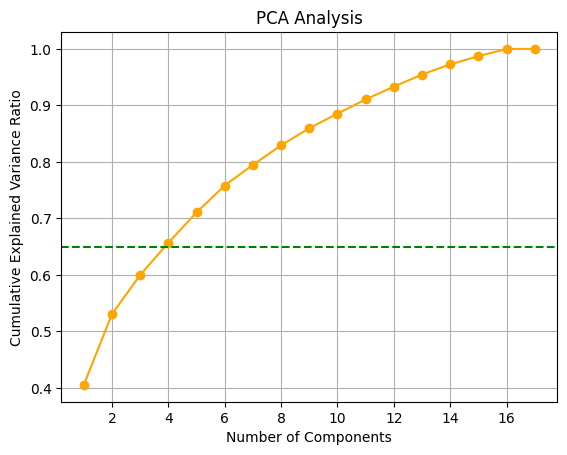

In [57]:
threshold = 0.65 # Threshold of explained variance

n_components = np.arange(1, k)

plt.plot(n_components, variance_ratio, marker='o', color='orange')
plt.axhline(threshold, color='g', linestyle='--')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()

In [58]:
desired_explained_variance = 0.65
num_components = np.argmax(variance_ratio >= desired_explained_variance) + 1

print(f"Number of components to explain {desired_explained_variance:.2f} variance: {num_components}")

# Fit PCA with the selected number of components
pca = PCA(n_components=num_components)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_df), columns=[f"PC{i+1}" for i in range(num_components)])

#PCA_ds.describe().T

Number of components to explain 0.65 variance: 4


### PCA - Final Processed PCA Dataset

In [59]:
PCA_ds.head()

,PC1,PC2,PC3,PC4
0,4.366147,-0.041365,-1.189213,0.246400
1,-2.767982,0.548798,1.458710,0.472835
2,2.124479,-0.606852,0.215080,-1.381024
3,-2.525975,-1.535843,-0.878191,-0.538085
4,-0.372164,-0.148857,-1.534165,1.630588


### K-Means Clustering
• Since the dataset **doesn't have labeled** groups, K-Means is used for clustering customer segments.

• **K-Means Clustering** an **Unsupervised Learning** algorithm that is used for analyzing and grouping data which doesn't have **pre-labeled class**. <br>

In [60]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer

### Elbow Method for K-Means Clustering - Optimal Number of Clusters
• **K** in K-Means refer to **the number of clusters** <br>
• **Elbow Method** allows visualizing **optimal number of clusters** based on given data: In this case, **4**. <br>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

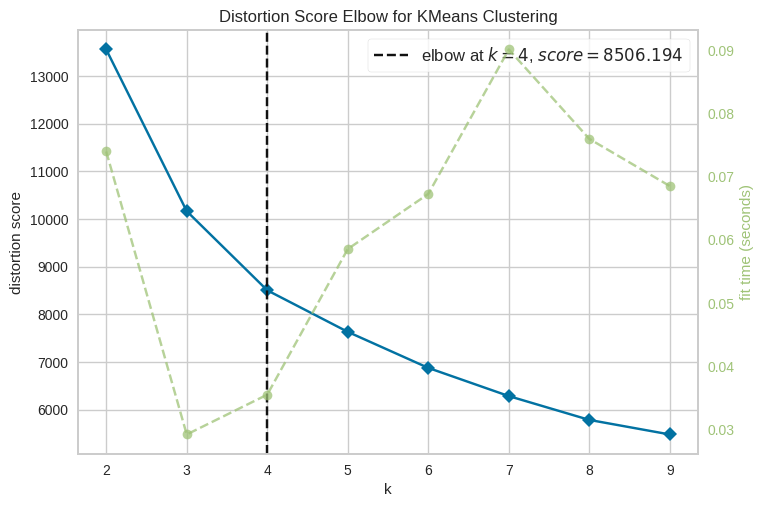

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [61]:
kelbow_visualizer(KMeans(random_state=4), PCA_ds, k=(2,10))

### Silhouette Analysis - Another Method for Selecting Optimal Number of Clusters

• **Definition**: <br>
**Mean Intra-Cluster Distance**: Mean distance between the observation and all other data points **in the same cluster**, and is denoted by **a**.<br>
**Mean Nearest-Cluster Distance**: Mean distance between the observation and all other data points of the **next nearest cluster**, and is denoted by **b**.

• **Silhouette Score** = (b – a)/ max(a, b)

From silhouette analysis, the number of **4 for n_clusters appears to be optimal** for the following reasons: <br>
• **Above average silhouette scores** for each cluster. <br>
• The fluctuation in **size is similar**. <br>
• **Similar thickness** of the silhouette plot representing each cluster <br>

Therefore, the **optimal number of clusters is 4**.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



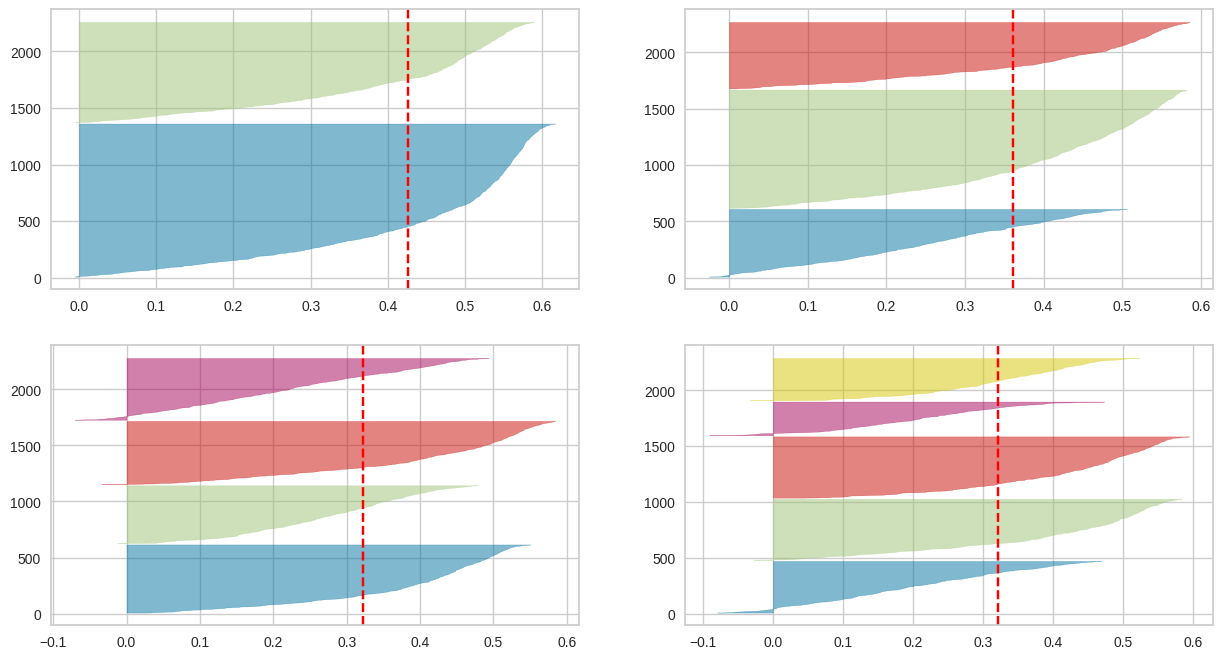

In [62]:
# Silheutte Analysis - Selecting the number of clusters

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)

    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(PCA_ds)

### K-Means


In [63]:
n_clusters = 4
max_iter = 1000
algorithm = 'elkan'

# Create a KMeans instance
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42, algorithm='elkan')

# Fit the KMeans model to your data
yhat = kmeans.fit_predict(PCA_ds)

# Assign cluster labels to your DataFrame
PCA_knn = PCA_ds
PCA_knn["Cluster"] = yhat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [64]:
PCA_knn.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster'], dtype='object')

In [65]:
# Find Strongly Correlated Variables
from scipy import stats
from collections import defaultdict

VARIABLES = ['PC1', 'PC2', 'PC3', 'PC4']

for c in VARIABLES:
    correlation = stats.pointbiserialr(PCA_knn[c], PCA_knn["Cluster"])
    print(c,correlation)

PC1 SignificanceResult(statistic=0.6322089395725992, pvalue=2.6889637284749288e-250)
PC2 SignificanceResult(statistic=0.5847301906686703, pvalue=1.3222724781911138e-205)
PC3 SignificanceResult(statistic=0.08582063702882227, pvalue=4.7619855404997e-05)
PC4 SignificanceResult(statistic=-0.10024588148180123, pvalue=1.995973895018716e-06)


In [66]:
knn_df = PCA_knn[['PC1', 'PC2', 'PC3', 'PC4', "Cluster"]]

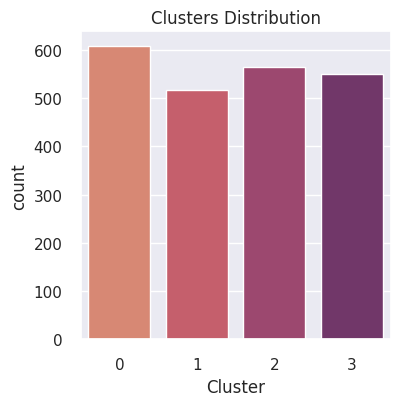

In [67]:
# Cluster Distribution
sns.set(rc={"figure.figsize":(4, 4)})
pl = sns.countplot(x=knn_df["Cluster"], palette="flare")
pl.set_title("Clusters Distribution")
plt.show()

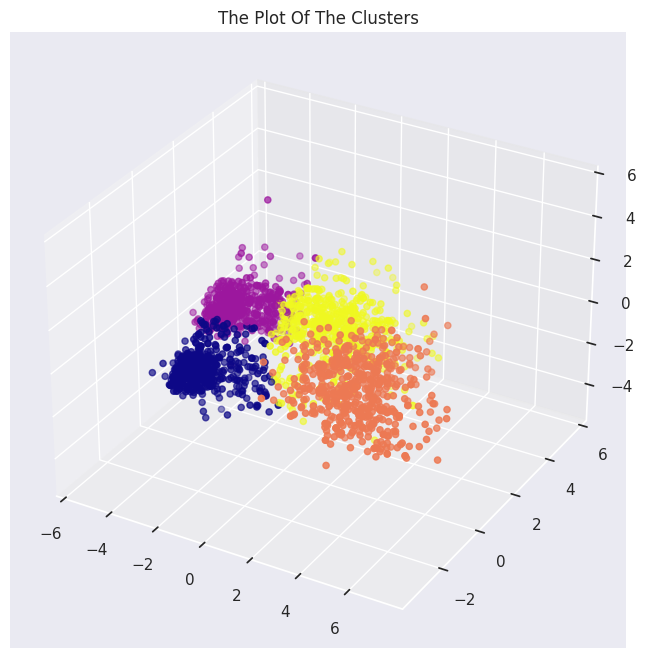

In [68]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
my_cmap = plt.get_cmap('plasma')
ax.scatter(knn_df["PC1"], knn_df["PC2"], knn_df["PC3"], c=knn_df["Cluster"], marker='o', cmap=my_cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

### Analyzing K-Means Clustering with PCA Results

• Append **K-Means results with assigned clusters** to the **dataframe with original features** for interpretation <br>
• Interpret each clusters based on distribution of important variables

In [79]:
old_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [81]:
# Adding relevant columns - Marital Status, Education, Cluster
#new_df[["Relationship_Status", "Education"]]=df[["Marital_Status", "Education"]]
new_df["Education_Old"]=old_df["Education"]
new_df["Relationship_New"]=old_df['Marital_Status']

new_df["Cluster"] = knn_df["Cluster"]

In [73]:
# Prepared Dataframe
new_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Total_Spending', 'Children', 'Education_Old', 'Relationship_New',
       'Cluster'],
      dtype='object')

In [82]:
new_df["Relationship_New"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [83]:
old_df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [84]:
# List of variables for KDE or Bar plot

kde_plot = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
'Total_Spending', 'Children']

bar_plot = ['Relationship_Status', 'Education']

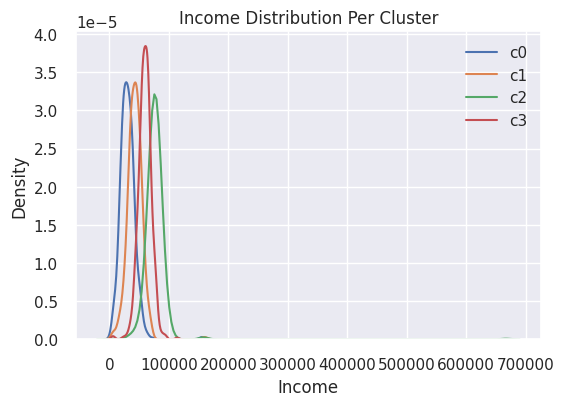

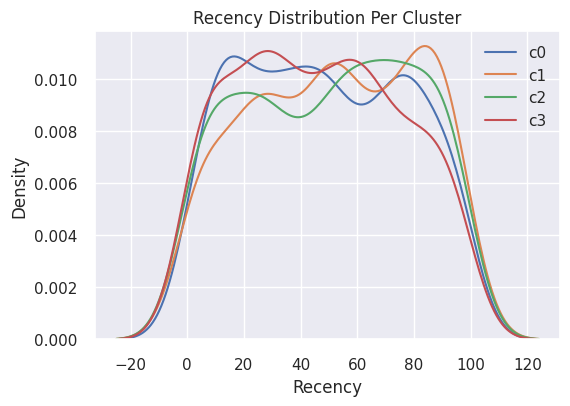

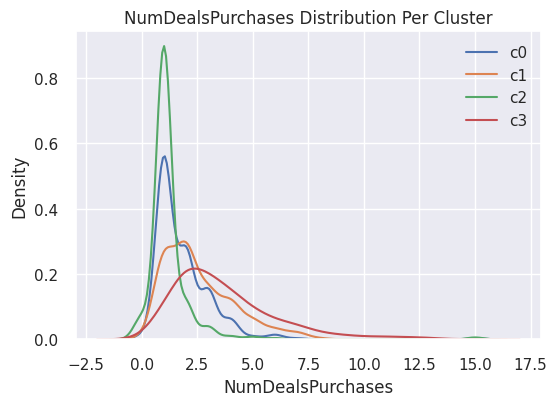

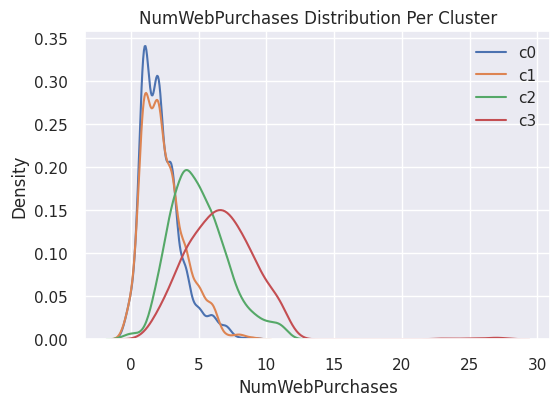

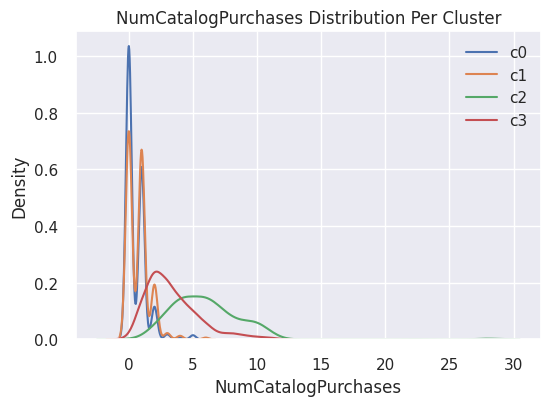

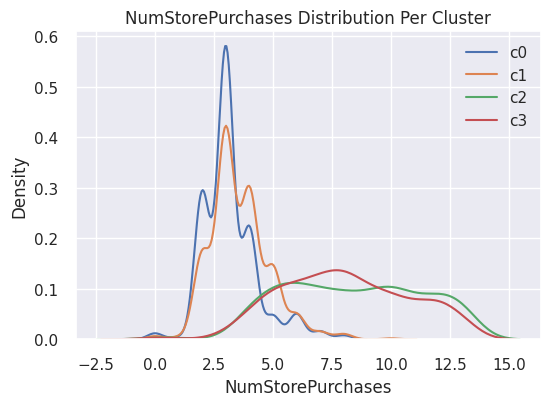

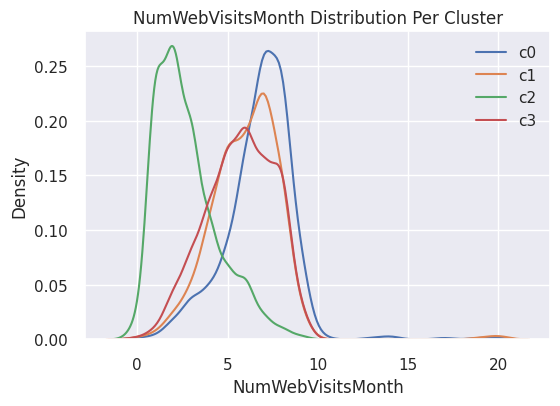

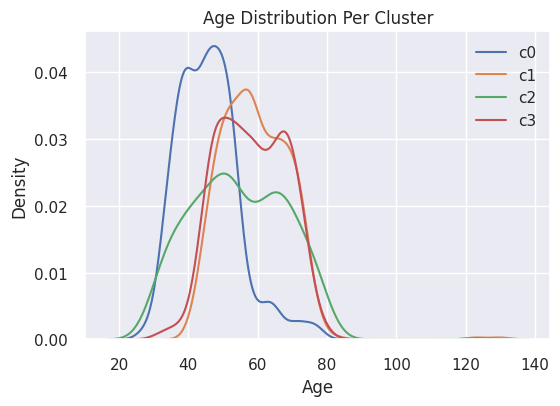

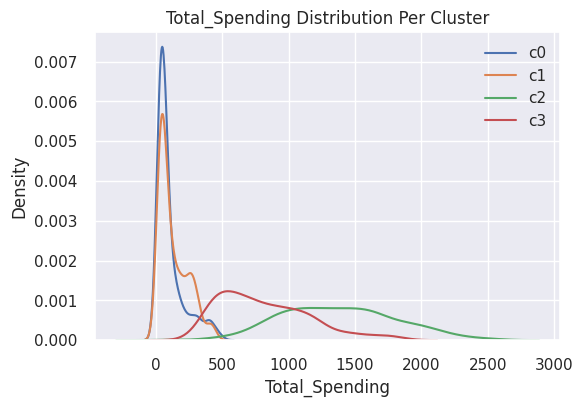

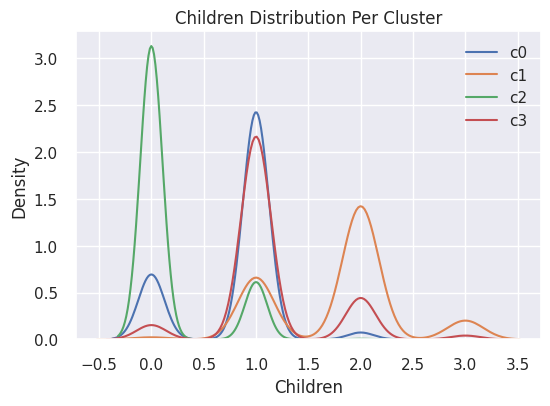

In [85]:
for variable in kde_plot:
  c0 = new_df[new_df.Cluster == 0]
  c1 = new_df[new_df.Cluster == 1]
  c2 = new_df[new_df.Cluster == 2]
  c3 = new_df[new_df.Cluster == 3]

  plt.figure(figsize=(6,4))
  sns.kdeplot(data=c0, x=variable, label='c0')
  sns.kdeplot(data=c1, x=variable, label='c1')
  sns.kdeplot(data=c2, x=variable, label='c2')
  sns.kdeplot(data=c3, x=variable, label='c3')

  plt.title(variable + " Distribution Per Cluster")
  plt.legend()
  plt.show()

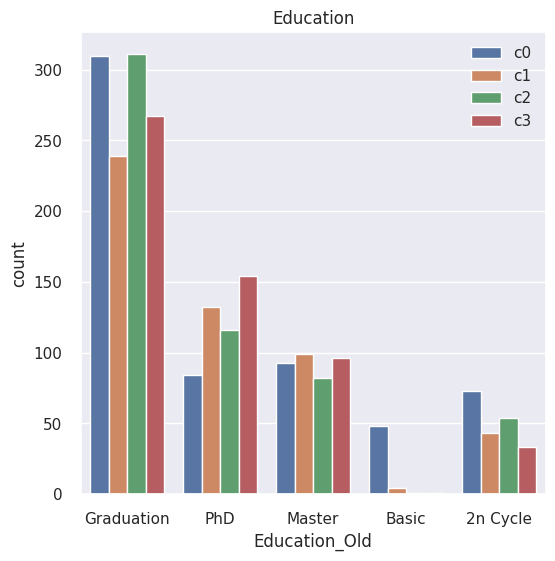

In [86]:
plt.figure(figsize=(6,6))
sns.countplot(x=new_df["Education_Old"], hue=new_df["Cluster"])
plt.title("Education")
plt.legend(['c0', 'c1', 'c2', 'c3'])
plt.show()

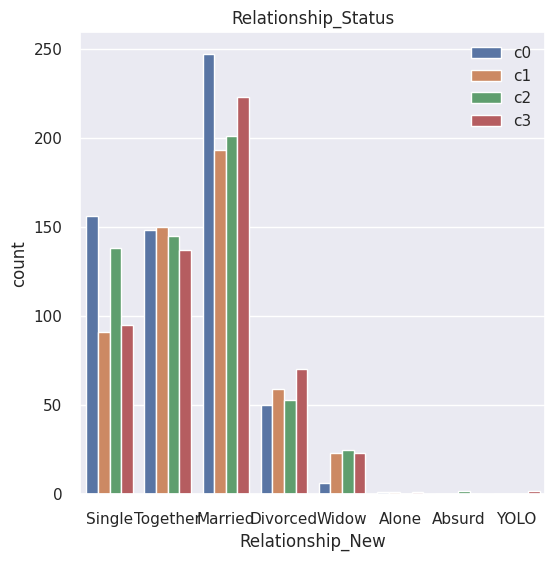

In [87]:
plt.figure(figsize=(6,6))
sns.countplot(x=new_df["Relationship_New"], hue=new_df["Cluster"])
plt.title("Relationship_Status")
plt.legend(['c0', 'c1', 'c2', 'c3'])
plt.show()

## Customer Segment Interpretation
### **Cluster 0**
• Lower income <br>
• Early-Middle age <br>
• Lower total spending (<500) <br>
• 1 child or less <br>
• College grad <br>
• Married or single <br>

### **Cluster 1** <br>
• Higher income (more than Cluster 0, but less than Cluster 2 and Cluster 3)<br>
• Middle age <br>
• Lower total spending (<500) <br>
• Mostly 2 children<br>
• College grad and up (PhD, Master, 2nd Cycle)<br>
• Married or in a relationship<br>

### **Cluster 2** <br>
• Highest income<br>
• Middle age <br>
• Higher total spending (500-2500) <br>
• No children <br>
• College grad and up (PhD, Master, 2nd Cycle)<br>
• Married or in a relationship<br>


### **Cluster 3**<br>
• Higher income (more than Cluster 1, but less than Cluster 2)<br>
• Middle-Retirement age <br>
• Higher total spending (>500)<br>
• 1 children and more<br>
• College grad and up (PhD, Master, 2nd Cycle)<br>
• Married <br>


## Reference
https://online.stat.psu.edu/stat500/lesson/6a/6a.4/6a.4.1 <br>
https://colab.research.google.com/drive/1UZy5fyZsgvihJFdYWF5owSwFEPVs6B45?usp=sharing#scrollTo=41b544bb-eaac-46f9-a2a5-c1d5c875053f <br>
https://365datascience.com/tutorials/python-tutorials/pca-k-means/ <br>
https://towardsdatascience.com/an-interactive-guide-to-hypothesis-testing-in-python-979f4d62d85 <br>

